# Optimización Multiobjetivo sobre Clusters

En esta notebook aplicaremos técnicas de **optimización multiobjetivo** para identificar el **frente de Pareto** sobre los clusters previamente obtenidos. A diferencia del análisis realizado en `modelo.py`, que considera la optimización a nivel individual, aquí nos centraremos en optimizar a nivel de clusters.

La optimización multiobjetivo abordará específicamente dos objetivos principales:

1. **Maximizar la cobranza realizada por la empresa**.
2. **Minimizar las comisiones asociadas**.

Al considerar simultáneamente ambas funciones objetivo, obtendremos un conjunto de soluciones óptimas conocido como **frente de Pareto**. Este frente permite visualizar claramente los mejores compromisos posibles entre los objetivos planteados, facilitando la toma de decisiones informadas y estratégicas.


In [2]:
import pandas as pd

# Cargar df11 completo (incluyendo idCredito)
df11 = pd.read_csv('df11.csv')

# Cargar embeddings y clusters
df_embeddings = pd.read_csv('final_embeddings.csv')

# Asegúrate de que tenga idCredito
id_credito = pd.read_csv('df11.csv', usecols=['idCredito'])
df_embeddings['idCredito'] = id_credito.values

# Unir por idCredito
df11_con_cluster = df11.merge(df_embeddings[['idCredito', 'cluster']], on='idCredito', how='left')

# (Opcional) Guardar o visualizar
print(df11_con_cluster.head())
# df11_con_cluster.to_csv('df11_con_cluster.csv', index=False)


   idCredito  idBanco  montoExigible  montoCobrar  montoCobrado  \
0       3674       72       0.009867     0.009867           0.0   
1       4914       72       0.014234     0.014234           0.0   
2       8972       44       0.031731     0.031731           0.0   
3       9066       72       0.005986     0.005986           0.0   
4       9872        2       0.012550     0.012550           0.0   

   idRespuestaBanco  idEmisora  TipoEnvio  Emisora  hora_cos  \
0               1.0         12          6        0  0.108867   
1               4.0         12          6        0 -0.043112   
2               8.0         25          2        5  0.087156   
3               3.0         12          6        0  0.108867   
4               4.0          5          6        7 -0.675590   

   diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  costo_transaccion  \
0          -0.632103                NaN        -0.632103            0.31250   
1          -0.730437                NaN        -0.7304

In [3]:
#importar csv
df7 = pd.read_csv('df72.csv')

In [4]:
import pandas as pd

# Asumiendo que tus DataFrames ya están cargados:
# df7: DataFrame principal (7 millones de filas)
# df11_con_cluster: contiene columnas ['idCredito', 'cluster']

# Crear una serie para el mapeo rápido de clusters usando idCredito
cluster_mapping = df11_con_cluster.set_index('idCredito')['cluster']

# Asignar los clusters directamente a df7 usando 'map'
df7['cluster'] = df7['idCredito'].map(cluster_mapping)

# Opcional: Manejo explícito para casos sin cluster asignado
df7['cluster'].fillna(-1, inplace=True)  # puedes cambiar el valor -1 por otro identificador si lo deseas

# Revisión del resultado
print(df7.head())


   idListaCobro  idCredito  consecutivoCobro  idBanco  montoExigible  \
0        139345      85784          35530241       12         539.53   
1        139345     122162          35530242       12         468.56   
2        139345     122162          35530243       12         780.94   
3        139345     122162          35530244       12         312.37   
4        139345     123763          35530245       12         817.48   

   montoCobrar  montoCobrado  idRespuestaBanco  idEmisora  TipoEnvio  Emisora  \
0       539.53           0.0               4.0          6          6        8   
1       468.56           0.0               4.0          6          6        8   
2       780.94           0.0               4.0          6          6        8   
3       312.37           0.0               4.0          6          6        8   
4       817.48           0.0               4.0          6          6        8   

   hora_cos  diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  \
0 -0.84572

C:\Users\hendr\AppData\Local\Temp\ipykernel_49744\2867635851.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df7['cluster'].fillna(-1, inplace=True)  # puedes cambiar el valor -1 por otro identificador si lo deseas


In [5]:
df11_con_cluster

,idCredito,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion,cluster
0,3674,72,0.009867,0.009867,0.000000,1.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250,3
1,4914,72,0.014234,0.014234,0.000000,4.0,12,6,0,-0.043112,-0.730437,NaN,-0.730437,0.31250,3
2,8972,44,0.031731,0.031731,0.000000,8.0,25,2,5,0.087156,-0.632103,NaN,-0.632103,0.00000,0
3,9066,72,0.005986,0.005986,0.000000,3.0,12,6,0,0.108867,-0.632103,NaN,-0.632103,0.31250,3
4,9872,2,0.012550,0.012550,0.000000,4.0,5,6,7,-0.675590,0.696350,NaN,0.696350,0.21875,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53647,755683,12,0.017347,0.017347,0.019562,0.0,21,1,6,0.160743,-0.671260,-0.671260,-0.671260,0.50000,2
53648,755695,14,0.081521,0.081521,0.088714,0.0,9,6,3,0.156434,-0.671260,-0.683919,-0.671260,0.35250,1
53649,755726,12,0.096890,0.096890,0.105275,0.0,21,1,6,-0.526214,-0.732494,-0.732494,-0.732494,0.50000,2
53650,755859,2,0.090029,0.090029,0.000000,4.0,5,6,7,-0.898794,-0.755493,NaN,-0.755493,0.21875,2


In [7]:
# Crear un diccionario con cada cluster como DataFrame independiente
df11_clusters = {
    f'cluster_{k}': grupo.reset_index(drop=True)
    for k, grupo in df11_con_cluster.groupby('cluster')
}

# Crear variables independientes en el entorno
globals().update(df11_clusters)

# Ejemplo de acceso
print(cluster_0.head())  # Muestra las filas de cluster 0 en df11


   idCredito  idBanco  montoExigible  montoCobrar  montoCobrado  \
0       8972       44       0.031731     0.031731           0.0   
1      11616       44       0.067551     0.067551           0.0   
2      60173       44       0.100652     0.100652           0.0   
3      63162       72       0.186914     0.186914           0.0   
4      73262       72       0.068034     0.068034           0.0   

   idRespuestaBanco  idEmisora  TipoEnvio  Emisora  hora_cos  \
0               8.0         25          2        5  0.087156   
1               8.0         25          2        5 -0.229200   
2               3.0         25          2        5  0.087156   
3              30.0         12          6        0  0.091501   
4              26.0         12          6        0 -0.231230   

   diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  costo_transaccion  \
0          -0.632103                NaN        -0.632103             0.0000   
1           0.677615                NaN         0.6776

In [8]:
cluster_0

,idCredito,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion,cluster
0,8972,44,0.031731,0.031731,0.000000,8.0,25,2,5,0.087156,-0.632103,NaN,-0.632103,0.0000,0
1,11616,44,0.067551,0.067551,0.000000,8.0,25,2,5,-0.229200,0.677615,NaN,0.677615,0.0000,0
2,60173,44,0.100652,0.100652,0.000000,3.0,25,2,5,0.087156,-0.944188,NaN,-0.944188,0.0000,0
3,63162,72,0.186914,0.186914,0.000000,30.0,12,6,0,0.091501,0.616816,NaN,0.616816,0.3125,0
4,73262,72,0.068034,0.068034,0.000000,26.0,12,6,0,-0.231230,0.809466,NaN,0.809466,0.3125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,751069,44,0.024708,0.024708,0.027494,0.0,25,2,5,0.039260,-0.645348,-0.658402,-0.645348,0.7500,0
2530,753636,72,0.012325,0.012325,0.007076,26.0,12,6,0,0.241922,-0.521445,-0.474951,-0.521445,0.3125,0
2531,754328,72,0.016623,0.016623,0.000000,26.0,12,6,0,0.241922,-0.645348,NaN,-0.645348,0.3125,0
2532,754475,72,0.030054,0.030054,0.000000,26.0,12,6,0,0.241922,-0.645348,NaN,-0.645348,0.3125,0



### 1. **Entrenamiento de Modelos Predictivos**

Para cada cluster, se entrenan dos modelos utilizando **XGBoost**:

- Modelo 1: Predicción del **monto cobrado** (\(y_{\text{cobro}}\))
- Modelo 2: Predicción del **costo por transacción** (\(y_{\text{costo}}\))

Estos modelos aprenden relaciones del tipo:

\[
y_{\text{cobro}} = f_{\text{cobro}}(X), \quad y_{\text{costo}} = f_{\text{costo}}(X)
\]

donde:

- \( X \) representa las características seleccionadas (por ejemplo, hora de envío, tipo de envío, monto exigible, etc.).

---

### 2. **Optimización Multiobjetivo con Optuna**

Para explorar las posibles combinaciones de características que ofrecen mejores compromisos entre los dos objetivos, utilizamos la biblioteca **Optuna**, con la función objetivo:

\[
\text{Minimizar} \quad (y_{\text{costo}}, -y_{\text{cobro}})
\]

El objetivo matemático queda definido como:

\[
\begin{aligned}
& \text{Minimizar: } y_{\text{costo}} = f_{\text{costo}}(X) \\
& \text{Maximizar: } y_{\text{cobro}} = f_{\text{cobro}}(X) \quad \rightarrow \quad \text{Minimizar: } -y_{\text{cobro}}
\end{aligned}
\]

Esto es conocido como **Optimización Multiobjetivo**, ya que busca simultáneamente la mejor combinación posible de ambos objetivos.

---

### 3. **Frente de Pareto**

El resultado final de este proceso es un conjunto de soluciones conocido como **frente de Pareto**, que se define matemáticamente así:

Una solución \(x^*\) es **óptima en el sentido de Pareto** si no existe otra solución \(x\) tal que:

\[
f_i(x) \leq f_i(x^*), \quad \forall i, \quad \text{y} \quad f_j(x) < f_j(x^*) \quad \text{para algún } j
\]

En palabras simples, una solución es óptima en Pareto si no existe otra solución que mejore simultáneamente todos los objetivos. El frente de Pareto, por tanto, representa todas las soluciones que equilibran los objetivos de forma eficiente.

---

## 📌 **Implementación aplicada en cada cluster**

El proceso explicado anteriormente es aplicado por separado para cada cluster, lo que permite una optimización más específica y eficiente, adaptada a las características particulares de cada grupo identificado mediante clustering.

Esto brinda la ventaja de obtener estrategias personalizadas y optimizadas para diferentes segmentos de comportamiento observados en los datos.











In [9]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import optuna

COLUMNAS_MODELO = [
    'montoExigible',
    'TipoEnvio',
    'hora_cos',
    'diaEnvioCobro_cos',
    'diaCobroBanco_cos',
    'diaCreacion_cos'
]

def optimizar_cluster(df_cluster, cluster_name, n_trials=250):

    X = df_cluster[COLUMNAS_MODELO].fillna(-1) # Manejar NaNs
    y_cobro = df_cluster['montoCobrado']
    y_costo = df_cluster['costo_transaccion']

    X_train, X_test, y_cobro_train, y_cobro_test = train_test_split(
        X, y_cobro, test_size=0.2, random_state=42)
    _, _, y_costo_train, y_costo_test = train_test_split(
        X, y_costo, test_size=0.2, random_state=42)

    # Modelo para montoCobrado
    model_cobro = xgb.XGBRegressor(tree_method='gpu_hist', objective='reg:squarederror')
    model_cobro.fit(X_train, y_cobro_train)

    # Modelo para costo_transaccion
    model_costo = xgb.XGBRegressor(tree_method='gpu_hist', objective='reg:squarederror')
    model_costo.fit(X_train, y_costo_train)

    def objective(trial):
        input_features = pd.DataFrame([{
            'montoExigible': trial.suggest_float('montoExigible', float(X['montoExigible'].min()), float(X['montoExigible'].max())),
            'TipoEnvio': trial.suggest_int('TipoEnvio', int(X['TipoEnvio'].min()), int(X['TipoEnvio'].max())),
            'hora_cos': trial.suggest_float('hora_cos', float(X['hora_cos'].min()), float(X['hora_cos'].max())),
            'diaEnvioCobro_cos': trial.suggest_float('diaEnvioCobro_cos', float(X['diaEnvioCobro_cos'].min()), float(X['diaEnvioCobro_cos'].max())),
            'diaCobroBanco_cos': trial.suggest_float('diaCobroBanco_cos', float(X['diaCobroBanco_cos'].min()), float(X['diaCobroBanco_cos'].max())),
            'diaCreacion_cos': trial.suggest_float('diaCreacion_cos', float(X['diaCreacion_cos'].min()), float(X['diaCreacion_cos'].max()))
        }], columns=COLUMNAS_MODELO)

        pred_cobro = model_cobro.predict(input_features)[0]
        pred_costo = model_costo.predict(input_features)[0]

        return pred_costo, -pred_cobro

    study = optuna.create_study(directions=["minimize", "minimize"])
    study.optimize(objective, n_trials=n_trials)

    print(f"\n🚀 Resultados para {cluster_name}:")
    for trial in study.best_trials[:5]:  # Top 5 mejores soluciones
        print(f"Parámetros óptimos: {trial.params}, Valores (Costo, -Cobro): {trial.values}")

    return study

# Ejecutar optimización para todos los clusters
studies_clusters = {}
for i in range(5):
    df_cluster = globals()[f'cluster_{i}']
    cluster_name = f'Cluster_{i}'
    print(f"\n🔷 Iniciando optimización para {cluster_name} 🔷")
    study = optimizar_cluster(df_cluster, cluster_name, n_trials=50)
    studies_clusters[cluster_name] = study



🔷 Iniciando optimización para Cluster_0 🔷


C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [05:50:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [05:50:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-25 05:50:19,139] A new study create


🚀 Resultados para Cluster_0:
Parámetros óptimos: {'montoExigible': 0.3560942329099944, 'TipoEnvio': 6, 'hora_cos': -0.5669051928880409, 'diaEnvioCobro_cos': 0.6738375738005398, 'diaCobroBanco_cos': 0.47280478860287145, 'diaCreacion_cos': 0.9746689138125506}, Valores (Costo, -Cobro): [0.15846532583236694, -0.08711971342563629]
Parámetros óptimos: {'montoExigible': 0.18482683551319667, 'TipoEnvio': 6, 'hora_cos': 0.3974321389593296, 'diaEnvioCobro_cos': 0.8410654142943386, 'diaCobroBanco_cos': 0.28707546482697843, 'diaCreacion_cos': 0.5335030113996051}, Valores (Costo, -Cobro): [0.3124450445175171, -0.097697913646698]
Parámetros óptimos: {'montoExigible': 0.3293740240010514, 'TipoEnvio': 6, 'hora_cos': 0.6719275621116771, 'diaEnvioCobro_cos': 0.9284341414988939, 'diaCobroBanco_cos': 0.29605790382638597, 'diaCreacion_cos': 0.2922287651896085}, Valores (Costo, -Cobro): [0.3073224425315857, -0.09135746210813522]
Parámetros óptimos: {'montoExigible': 0.19664493070873154, 'TipoEnvio': 6, 'ho

C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [05:50:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-25 05:50:20,501] A new study created in memory with name: no-name-ab3e7de5-99e4-439b-ac70-b8c3f40503e0
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:2676: UserWarning: [05:50:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "his


🚀 Resultados para Cluster_1:
Parámetros óptimos: {'montoExigible': 0.3264426161198354, 'TipoEnvio': 6, 'hora_cos': -0.31162236552211264, 'diaEnvioCobro_cos': -0.5917411862392775, 'diaCobroBanco_cos': -0.12194857304741524, 'diaCreacion_cos': 0.4335279415167169}, Valores (Costo, -Cobro): [0.25062787532806396, -0.07965469360351562]
Parámetros óptimos: {'montoExigible': 0.13823959137512923, 'TipoEnvio': 1, 'hora_cos': -0.631650168544469, 'diaEnvioCobro_cos': -0.4679583529164967, 'diaCobroBanco_cos': -0.13106835996005994, 'diaCreacion_cos': -0.01181253016149364}, Valores (Costo, -Cobro): [0.09869502484798431, -0.038541730493307114]
Parámetros óptimos: {'montoExigible': 0.3478335492478307, 'TipoEnvio': 4, 'hora_cos': 0.26371362492808226, 'diaEnvioCobro_cos': -0.6854908896062128, 'diaCobroBanco_cos': 0.06066182576925239, 'diaCreacion_cos': -0.039438887939604705}, Valores (Costo, -Cobro): [0.44769853353500366, -0.23073183000087738]
Parámetros óptimos: {'montoExigible': 0.12788561810588603, 'T

C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [05:50:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-25 05:50:21,804] A new study created in memory with name: no-name-21176a8d-1780-44be-b054-79e9fee352b0
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:2676: UserWarning: [05:50:21] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "his


🚀 Resultados para Cluster_2:
Parámetros óptimos: {'montoExigible': 0.7295128181266763, 'TipoEnvio': 1, 'hora_cos': -0.48769972948094753, 'diaEnvioCobro_cos': -0.566664432542517, 'diaCobroBanco_cos': -0.9914309673489368, 'diaCreacion_cos': -0.8771673160529201}, Valores (Costo, -Cobro): [0.011003062129020691, -0.0019332938827574253]
Parámetros óptimos: {'montoExigible': 0.9775220955712381, 'TipoEnvio': 1, 'hora_cos': -0.6110791233016165, 'diaEnvioCobro_cos': -0.069926055995574, 'diaCobroBanco_cos': 0.9468134217670123, 'diaCreacion_cos': -0.5942906121214702}, Valores (Costo, -Cobro): [0.15727603435516357, -0.24811606109142303]
Parámetros óptimos: {'montoExigible': 0.4869054122251018, 'TipoEnvio': 0, 'hora_cos': 0.04052139410064548, 'diaEnvioCobro_cos': -0.26091574229719594, 'diaCobroBanco_cos': 0.4101549083586551, 'diaCreacion_cos': 0.3696413091560544}, Valores (Costo, -Cobro): [0.17984429001808167, -0.29968345165252686]
Parámetros óptimos: {'montoExigible': 0.5984212936390861, 'TipoEnvi

C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [05:50:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-25 05:50:22,950] A new study created in memory with name: no-name-fddf55be-b096-47ce-baa9-283c7c3dc7e2
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:2676: UserWarning: [05:50:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "his


🚀 Resultados para Cluster_3:
Parámetros óptimos: {'montoExigible': 0.21278604058566994, 'TipoEnvio': 4, 'hora_cos': -0.6661076830222019, 'diaEnvioCobro_cos': 0.30356655698164536, 'diaCobroBanco_cos': -0.19541719336564856, 'diaCreacion_cos': -0.6285934489987226}, Valores (Costo, -Cobro): [0.3124258816242218, -0.18139433860778809]
Parámetros óptimos: {'montoExigible': 0.2569857057434768, 'TipoEnvio': 6, 'hora_cos': -0.6990896868249107, 'diaEnvioCobro_cos': 0.5737853761003117, 'diaCobroBanco_cos': 0.40445006929642746, 'diaCreacion_cos': -0.6403721483496947}, Valores (Costo, -Cobro): [0.31250086426734924, -0.21497632563114166]
Parámetros óptimos: {'montoExigible': 0.26972388057101027, 'TipoEnvio': 3, 'hora_cos': -0.6586319461905549, 'diaEnvioCobro_cos': 0.08501741708311539, 'diaCobroBanco_cos': -0.02409504132411522, 'diaCreacion_cos': -0.14660977683521426}, Valores (Costo, -Cobro): [0.3124999403953552, -0.20350432395935059]
Parámetros óptimos: {'montoExigible': 0.050044627738404554, 'Tipo

C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\training.py:183: UserWarning: [05:50:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-05-25 05:50:24,108] A new study created in memory with name: no-name-470e0c0a-fc50-4188-af61-ac965a92f573
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\xgboost\core.py:2676: UserWarning: [05:50:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "his


🚀 Resultados para Cluster_4:
Parámetros óptimos: {'montoExigible': 0.12643414532407182, 'TipoEnvio': 6, 'hora_cos': -0.6982588803294436, 'diaEnvioCobro_cos': -0.9585808580172518, 'diaCobroBanco_cos': -0.6052013385203648, 'diaCreacion_cos': 0.6181321037549614}, Valores (Costo, -Cobro): [0.12677858769893646, -0.017153501510620117]
Parámetros óptimos: {'montoExigible': 0.068444761277859, 'TipoEnvio': 2, 'hora_cos': -0.7717860524966715, 'diaEnvioCobro_cos': -0.6391868331717611, 'diaCobroBanco_cos': 0.5272366120324354, 'diaCreacion_cos': -0.6140560810243936}, Valores (Costo, -Cobro): [0.13562220335006714, -0.0275568887591362]
Parámetros óptimos: {'montoExigible': 0.09652877070761284, 'TipoEnvio': 3, 'hora_cos': -0.7051230069123906, 'diaEnvioCobro_cos': -0.48539895771670316, 'diaCobroBanco_cos': -0.18776160596699243, 'diaCreacion_cos': -0.20767143160610257}, Valores (Costo, -Cobro): [0.4274265170097351, -0.0597083680331707]
Parámetros óptimos: {'montoExigible': 0.3646054601364294, 'TipoEnvi

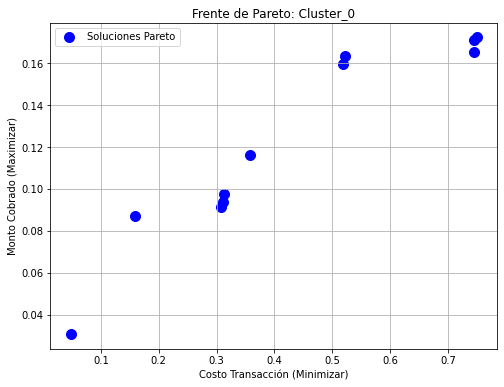

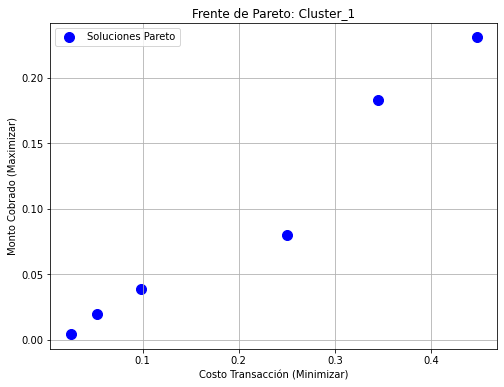

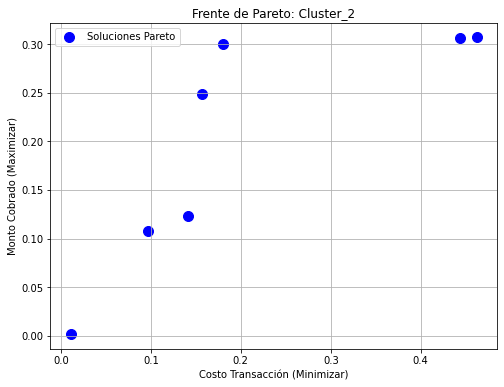

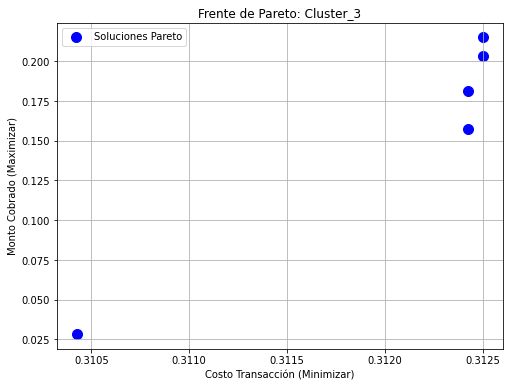

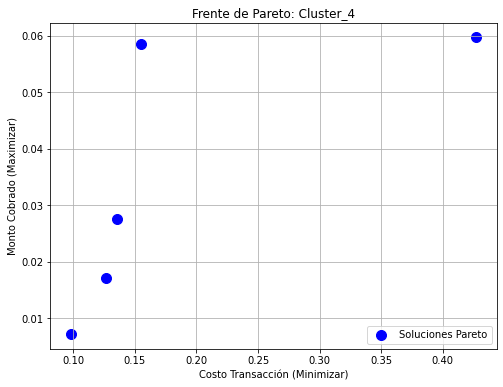

In [10]:
import matplotlib.pyplot as plt

def plot_pareto_front(study, cluster_name):
    costos = [t.values[0] for t in study.best_trials]
    cobros = [-t.values[1] for t in study.best_trials]  # recuerda que lo hicimos negativo para maximizar

    plt.figure(figsize=(8, 6))
    plt.scatter(costos, cobros, c='blue', label='Soluciones Pareto', s=100)

    plt.title(f'Frente de Pareto: {cluster_name}')
    plt.xlabel('Costo Transacción (Minimizar)')
    plt.ylabel('Monto Cobrado (Maximizar)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Usando tu diccionario studies_clusters
for cluster_name, study in studies_clusters.items():
    plot_pareto_front(study, cluster_name)


# Interpretación de los puntos generados en la optimización multiobjetivo

En esta optimización multiobjetivo, cada punto obtenido en el **frente de Pareto** representa tanto individuos reales de la base de datos como posibles escenarios alternativos.

- Los puntos correspondientes a personas reales indican la situación actual observada.
- Los puntos generados mediante optimización representan posibles elecciones o ajustes que podrían hacerse, basados en las decisiones individuales existentes.

Al evaluar cada uno de estos puntos, estamos tomando decisiones sobre dos objetivos principales:

- **Maximizar** la cobranza total.
- **Minimizar** el costo por transacción.

Cada punto es una combinación específica de estas dos métricas, mostrando claramente las consecuencias que tendría seleccionar dicha configuración en la práctica. De esta manera, se puede identificar rápidamente qué opciones podrían mejorar significativamente los resultados en comparación con las decisiones actuales.


In [11]:
df_cluster['pagado'] = (df_cluster['montoCobrado'] > 0).astype(int)


In [28]:
pip install catboost

   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
    --------------------------------------- 2.4/102.5 MB 15.0 MB/s eta 0:00:07
   -- ------------------------------------- 5.5/102.5 MB 15.3 MB/s eta 0:00:07
   --- ------------------------------------ 8.4/102.5 MB 14.9 MB/s eta 0:00:07
   ---- ----------------------------------- 11.3/102.5 MB 14.4 MB/s eta 0:00:07
   ----- ---------------------------------- 13.1/102.5 MB 13.1 MB/s eta 0:00:07
   ------ --------------------------------- 16.0/102.5 MB 13.1 MB/s eta 0:00:07
   ------- -------------------------------- 18.6/102.5 MB 13.2 MB/s eta 0:00:07
   -------- ------------------------------- 21.2/102.5 MB 12.9 MB/s eta 0:00:07
   --------- ------------------------------ 24.4/102.5 MB 13.1 MB/s eta 0:00:06
   ---------- ----------------------------- 27.8/102.5 MB 13.3 MB/s eta 0:00:06
   ----------- ---------------------------- 30.1/102.5 MB 13.2 MB/s eta 0:00:06
   ------------ --------------------------- 33.3/102


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\hendr\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
df7

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion,cluster
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00,1
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00,1
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00,1
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00,1
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,6,6,8,-0.845728,0.497513,NaN,0.497513,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75,2
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75,2
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75,2
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,5,6,7,-0.999048,-0.766659,NaN,-0.766659,1.75,2


In [ ]:
df7

In [13]:
import pandas as pd

# Crear un diccionario con cada cluster como DataFrame independiente
df7_clusters = {
    f'cluster_{k}': grupo.reset_index(drop=True)
    for k, grupo in df7.groupby('cluster')
}

# Crear variables independientes en el entorno global
globals().update(df7_clusters)

# Ejemplo de acceso
print(cluster_0.head())  # Muestra las primeras filas del cluster 0
print(cluster_1.head())  # Muestra las primeras filas del cluster 1, etc.


   idListaCobro  idCredito  consecutivoCobro  idBanco  montoExigible  \
0        139419     636732          35563474      127          53.51   
1        139420     377529          35563489      127         272.50   
2        139420     397484          35563501      127         210.55   
3        139420     447314          35563513      127          66.24   
4        139420     451411          35563515      127         301.98   

   montoCobrar  montoCobrado  idRespuestaBanco  idEmisora  TipoEnvio  Emisora  \
0        53.51           0.0               4.0          6          6        8   
1       272.50           0.0               4.0          6          6        8   
2       210.55           0.0               4.0          6          6        8   
3        66.24           0.0               4.0          6          6        8   
4       301.98           0.0               4.0          6          6        8   

   hora_cos  diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  \
0 -0.81664

In [15]:
cluster_0

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion,cluster
0,139419,636732,35563474,127,53.51,53.51,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,0
1,139420,377529,35563489,127,272.50,272.50,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,0
2,139420,397484,35563501,127,210.55,210.55,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,0
3,139420,447314,35563513,127,66.24,66.24,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,0
4,139420,451411,35563515,127,301.98,301.98,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21471,162158,721510,44259071,127,198.01,198.01,0.0,4.0,6,6,8,-0.973379,-0.732494,NaN,-0.732494,0.0,0
21472,162158,722298,44259072,127,669.09,669.09,0.0,4.0,6,6,8,-0.973379,-0.732494,NaN,-0.732494,0.0,0
21473,162158,723929,44259073,137,1244.71,1244.71,0.0,4.0,6,6,8,-0.973379,-0.732494,NaN,-0.732494,0.0,0
21474,162158,724615,44259074,127,945.32,945.32,0.0,4.0,6,6,8,-0.973379,-0.732494,NaN,-0.732494,0.0,0


In [14]:
import pandas as pd

# Crear un diccionario con cada cluster como DataFrame independiente
df7_clusters = {
    f'cluster_{k}': grupo.reset_index(drop=True)
    for k, grupo in df7.groupby('cluster')
}

# Crear variables independientes en el entorno global
globals().update(df7_clusters)

# Guardar cada DataFrame en un archivo CSV independiente
for cluster_name, df_cluster in df7_clusters.items():
    filename = f"{cluster_name}.csv"
    df_cluster.to_csv(filename, index=False)
    print(f"Cluster guardado en: {filename}")


Cluster guardado en: cluster_0.csv
Cluster guardado en: cluster_1.csv
Cluster guardado en: cluster_2.csv
Cluster guardado en: cluster_3.csv
Cluster guardado en: cluster_4.csv


In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

def entrenar_modelos_cluster(cluster_df):
    X = cluster_df[['idBanco', 'montoExigible', 'hora_cos', 'diaEnvioCobro_cos', 'TipoEnvio', 'idEmisora']]
    y_cobrado = cluster_df['montoCobrado']
    y_costo = cluster_df['costo_transaccion']

    X_train, _, y_cobrado_train, _ = train_test_split(X, y_cobrado, test_size=0.2, random_state=42)
    _, _, y_costo_train, _ = train_test_split(X, y_costo, test_size=0.2, random_state=42)

    modelo_cobrado = xgb.XGBRegressor(tree_method='hist', device='cuda')
    modelo_costo = xgb.XGBRegressor(tree_method='hist', device='cuda')

    modelo_cobrado.fit(X_train, y_cobrado_train)
    modelo_costo.fit(X_train, y_costo_train)

    return modelo_cobrado, modelo_costo


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los CSV generados
clusters = {}
num_clusters = 5

for idx in range(num_clusters):
    clusters[f'Cluster_{idx}'] = pd.read_csv(f'pareto_cluster_{idx}.csv')

In [35]:
cluster_4

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,Emisora,hora_cos,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion,cluster
0,139418,80296,35563420,21,51.10,51.10,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,4
1,139418,80296,35563421,21,85.16,85.16,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,4
2,139418,116232,35563422,21,160.35,160.35,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,4
3,139418,116232,35563423,21,267.25,267.25,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,4
4,139418,116232,35563424,21,106.90,106.90,0.0,4.0,6,6,8,-0.816642,0.452072,NaN,0.452072,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110446,162234,416184,44282767,21,178.77,178.77,0.0,4.0,6,6,8,-0.707107,-0.755493,NaN,-0.755493,0.0,4
110447,162234,416184,44282768,21,268.15,268.15,0.0,4.0,6,6,8,-0.707107,-0.755493,NaN,-0.755493,0.0,4
110448,162234,524583,44282769,21,756.66,756.66,0.0,4.0,6,6,8,-0.707107,-0.755493,NaN,-0.755493,0.0,4
110449,162234,524583,44282770,21,1261.10,1261.10,0.0,4.0,6,6,8,-0.707107,-0.755493,NaN,-0.755493,0.0,4


# Optimización sobre solicitudes individuales

Finalmente, la optimización multiobjetivo no se realiza directamente sobre personas, sino sobre solicitudes específicas. 

Tras identificar y analizar los clusters en una primera etapa, regresamos al conjunto de datos original, previo al agrupamiento por personas en el proceso de limpieza. De esta forma, el modelo de optimización se aplica a nivel individual para cada solicitud registrada.

Este enfoque permite:

- Evaluar cada solicitud de forma específica.
- Tomar decisiones precisas para maximizar la cobranza o minimizar los costos de transacci


In [36]:
import optuna
import pandas as pd

def optimizar_pareto(cluster_df, model_cobrado, model_costo, trials=300):
    def objective(trial):
        # Espacio de búsqueda:
        idBanco = trial.suggest_int('idBanco', cluster_df['idBanco'].min(), cluster_df['idBanco'].max())
        montoExigible = trial.suggest_float('montoExigible', cluster_df['montoExigible'].min(), cluster_df['montoExigible'].max())
        hora_cos = trial.suggest_float('hora_cos', -1, 1)
        diaEnvioCobro_cos = trial.suggest_float('diaEnvioCobro_cos', -1, 1)
        TipoEnvio = trial.suggest_int('TipoEnvio', cluster_df['TipoEnvio'].min(), cluster_df['TipoEnvio'].max())
        idEmisora = trial.suggest_int('idEmisora', cluster_df['idEmisora'].min(), cluster_df['idEmisora'].max())

        features = pd.DataFrame([{
            'idBanco': idBanco,
            'montoExigible': montoExigible,
            'hora_cos': hora_cos,
            'diaEnvioCobro_cos': diaEnvioCobro_cos,
            'TipoEnvio': TipoEnvio,
            'idEmisora': idEmisora
        }])

        pred_cobrado = model_cobrado.predict(features)[0]
        pred_costo = model_costo.predict(features)[0]

        # Optimización: minimizar costo, maximizar cobrado
        return pred_costo, -pred_cobrado

    study = optuna.create_study(directions=['minimize', 'minimize'])
    study.optimize(objective, n_trials=trials)

    pareto_df = pd.DataFrame([{
        **t.params,
        'costo_transaccion': t.values[0],
        'montoCobrado': -t.values[1]
    } for t in study.best_trials])

    return pareto_df


In [37]:
clusters = [cluster_0, cluster_1, cluster_2, cluster_3, cluster_4]
resultados_pareto = {}

for idx, cluster_df in enumerate(clusters):
    print(f"🚀 Optimizando Cluster_{idx}")
    model_cobrado, model_costo = entrenar_modelos_cluster(cluster_df)
    pareto_df = optimizar_pareto(cluster_df, model_cobrado, model_costo, trials=100)
    resultados_pareto[f'Cluster_{idx}'] = pareto_df

    # Guardar claramente cada resultado
    pareto_df.to_csv(f'pareto_cluster_{idx}.csv', index=False)


🚀 Optimizando Cluster_0


[I 2025-05-25 06:56:47,908] A new study created in memory with name: no-name-7c449a6f-b32f-4607-b9a4-a8052a9d8dfe
[I 2025-05-25 06:56:47,934] Trial 0 finished with values: [2.444155693054199, -368.87921142578125] and parameters: {'idBanco': 90, 'montoExigible': 11044.044827365064, 'hora_cos': -0.33500752356610186, 'diaEnvioCobro_cos': 0.8574425020976426, 'TipoEnvio': 5, 'idEmisora': 22}.
[I 2025-05-25 06:56:47,956] Trial 1 finished with values: [0.7528011798858643, 28.30316162109375] and parameters: {'idBanco': 55, 'montoExigible': 8535.056970199337, 'hora_cos': 0.3432672883968584, 'diaEnvioCobro_cos': 0.6501642744339031, 'TipoEnvio': 6, 'idEmisora': 14}.
[I 2025-05-25 06:56:47,988] Trial 2 finished with values: [0.8027366399765015, -517.9322509765625] and parameters: {'idBanco': 55, 'montoExigible': 1184.2337534582994, 'hora_cos': 0.8743384762826822, 'diaEnvioCobro_cos': 0.682224250777971, 'TipoEnvio': 5, 'idEmisora': 12}.
[I 2025-05-25 06:56:48,007] Trial 3 finished with values: [2.4

🚀 Optimizando Cluster_1


[I 2025-05-25 06:56:56,291] A new study created in memory with name: no-name-77cb67fa-b331-48c0-b52c-44c1dbc78013
[I 2025-05-25 06:56:56,385] Trial 0 finished with values: [1.6445751190185547, -662.6137084960938] and parameters: {'idBanco': 59, 'montoExigible': 12682.799724926435, 'hora_cos': 0.1552853346648233, 'diaEnvioCobro_cos': 0.5341762777999333, 'TipoEnvio': 3, 'idEmisora': 17}.
[I 2025-05-25 06:56:56,458] Trial 1 finished with values: [1.2101702690124512, -568.8428955078125] and parameters: {'idBanco': 47, 'montoExigible': 18969.29488496173, 'hora_cos': -0.292136645267822, 'diaEnvioCobro_cos': -0.7564980909068477, 'TipoEnvio': 2, 'idEmisora': 24}.
[I 2025-05-25 06:56:56,575] Trial 2 finished with values: [0.3056873083114624, -605.4976806640625] and parameters: {'idBanco': 22, 'montoExigible': 12711.998805351004, 'hora_cos': -0.9819142705395543, 'diaEnvioCobro_cos': 0.2117441067986594, 'TipoEnvio': 2, 'idEmisora': 19}.
[I 2025-05-25 06:56:56,652] Trial 3 finished with values: [2

🚀 Optimizando Cluster_2


[I 2025-05-25 06:57:09,781] A new study created in memory with name: no-name-05e6b83a-927d-476b-a815-9ac6007e4327
[I 2025-05-25 06:57:09,838] Trial 0 finished with values: [-0.35440778732299805, -26832.42578125] and parameters: {'idBanco': 19, 'montoExigible': 51632.00768338567, 'hora_cos': -0.8952792023804634, 'diaEnvioCobro_cos': 0.20751795946659346, 'TipoEnvio': 5, 'idEmisora': 17}.
[I 2025-05-25 06:57:09,925] Trial 1 finished with values: [3.090174436569214, -7040.45263671875] and parameters: {'idBanco': 55, 'montoExigible': 89504.16274406234, 'hora_cos': -0.031112795243866787, 'diaEnvioCobro_cos': -0.6160884823034709, 'TipoEnvio': 6, 'idEmisora': 8}.
[I 2025-05-25 06:57:09,992] Trial 2 finished with values: [4.316470146179199, -4573.22119140625] and parameters: {'idBanco': 20, 'montoExigible': 17373.361090264683, 'hora_cos': 0.3812688394324226, 'diaEnvioCobro_cos': 0.7910111375629223, 'TipoEnvio': 3, 'idEmisora': 6}.
[I 2025-05-25 06:57:10,058] Trial 3 finished with values: [2.919

🚀 Optimizando Cluster_3


[I 2025-05-25 06:57:16,982] A new study created in memory with name: no-name-fe93401d-5fa8-4cbc-9b52-d80401abfe6b
[I 2025-05-25 06:57:17,011] Trial 0 finished with values: [2.4957704544067383, -46.0794677734375] and parameters: {'idBanco': 31, 'montoExigible': 360.0862393794197, 'hora_cos': 0.6314572569750005, 'diaEnvioCobro_cos': -0.08479358523306013, 'TipoEnvio': 3, 'idEmisora': 16}.
[I 2025-05-25 06:57:17,042] Trial 1 finished with values: [1.4689399003982544, 1458.694091796875] and parameters: {'idBanco': 43, 'montoExigible': 14261.040877386396, 'hora_cos': 0.4316420923795663, 'diaEnvioCobro_cos': 0.8160508310515489, 'TipoEnvio': 4, 'idEmisora': 19}.
[I 2025-05-25 06:57:17,070] Trial 2 finished with values: [2.575542688369751, -4100.61865234375] and parameters: {'idBanco': 54, 'montoExigible': 13784.97973822814, 'hora_cos': 0.7774223610187605, 'diaEnvioCobro_cos': -0.817974847429211, 'TipoEnvio': 2, 'idEmisora': 11}.
[I 2025-05-25 06:57:17,115] Trial 3 finished with values: [0.0906

🚀 Optimizando Cluster_4


[I 2025-05-25 06:57:21,293] A new study created in memory with name: no-name-e2082593-9d3b-44c9-a27d-c8fc8827d304
[I 2025-05-25 06:57:21,314] Trial 0 finished with values: [4.5647783279418945, -1132.1968994140625] and parameters: {'idBanco': 17, 'montoExigible': 12121.537320373296, 'hora_cos': 0.026657689173357646, 'diaEnvioCobro_cos': 0.8112086335310706, 'TipoEnvio': 4, 'idEmisora': 16}.
[I 2025-05-25 06:57:21,335] Trial 1 finished with values: [-0.11327248811721802, -144.9622802734375] and parameters: {'idBanco': 46, 'montoExigible': 1346.7056861741385, 'hora_cos': -0.9677845472938229, 'diaEnvioCobro_cos': 0.008644015168773445, 'TipoEnvio': 1, 'idEmisora': 19}.
[I 2025-05-25 06:57:21,354] Trial 2 finished with values: [2.0031328201293945, -1493.2149658203125] and parameters: {'idBanco': 20, 'montoExigible': 11675.492635383582, 'hora_cos': 0.42520152799932487, 'diaEnvioCobro_cos': 0.590873301781335, 'TipoEnvio': 2, 'idEmisora': 23}.
[I 2025-05-25 06:57:21,374] Trial 3 finished with va

C:\Users\hendr\AppData\Local\Temp\ipykernel_49744\2064139419.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


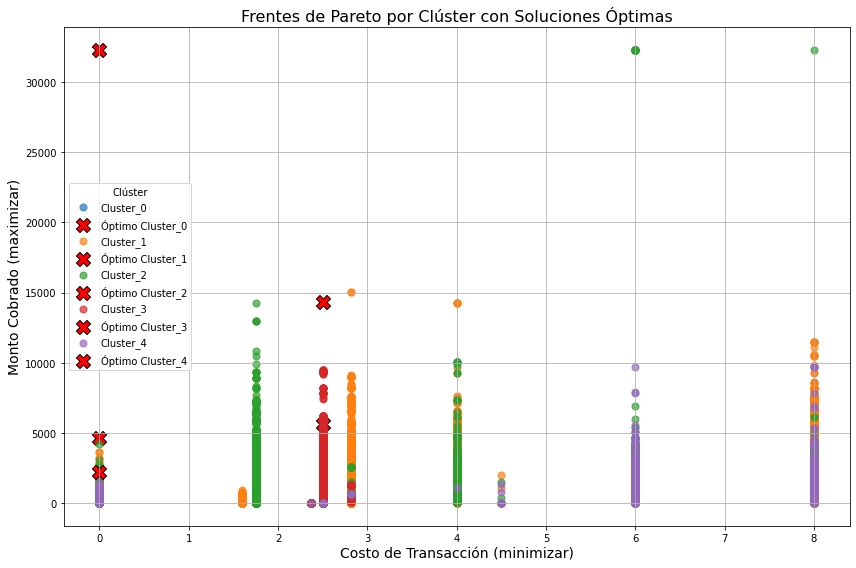

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

clusters = {
    'Cluster_0': cluster_0,
    'Cluster_1': cluster_1,
    'Cluster_2': cluster_2,
    'Cluster_3': cluster_3,
    'Cluster_4': cluster_4
}

plt.figure(figsize=(12, 8))
colores = sns.color_palette('tab10', len(clusters))

for idx, (nombre_cluster, df) in enumerate(clusters.items()):
    # Graficar frente de Pareto con las variables objetivo
    plt.scatter(
        df['costo_transaccion'],
        df['montoCobrado'],
        label=nombre_cluster,
        color=colores[idx],
        alpha=0.7,
        s=50
    )

    # Solución óptima: Mejor ratio cobro/costo
    ratio_optimo = (df['montoCobrado'] / df['costo_transaccion'].replace(0, 1e-9)).abs().idxmax()
    solucion_optima = df.loc[ratio_optimo]

    plt.scatter(
        solucion_optima['costo_transaccion'],
        solucion_optima['montoCobrado'],
        color='red',
        edgecolor='black',
        s=200,
        marker='X',
        label=f'Óptimo {nombre_cluster}'
    )

plt.title('Frentes de Pareto por Clúster con Soluciones Óptimas', fontsize=16)
plt.xlabel('Costo de Transacción (minimizar)', fontsize=14)
plt.ylabel('Monto Cobrado (maximizar)', fontsize=14)
plt.legend(title='Clúster')
plt.grid(True)

plt.tight_layout()
plt.show()


# Análisis y Automatización basada en el Frente de Pareto

Al concluir la optimización multiobjetivo, analizamos específicamente las soluciones que ofrecen una relación más alta entre **monto cobrado** y **costo por transacción**. Estas soluciones proporcionan una referencia clara y eficiente para implementar procesos automatizados.

Sin embargo, es importante enfatizar que cualquier punto del **frente de Pareto** representa una solución óptima. La elección específica dependerá de las necesidades y prioridades estratégicas de la empresa:

- Si la prioridad es **maximizar la cobranza**, se elegirán puntos más orientados a este objetivo.
- Si el enfoque es **minimizar las comisiones**, se seleccionarán puntos que reduzcan significativamente este costo.

De esta manera, el frente de Pareto ofrece flexibilidad estratégica para adaptar las decisiones automáticas a las metas concretas y cambiantes de la organización.


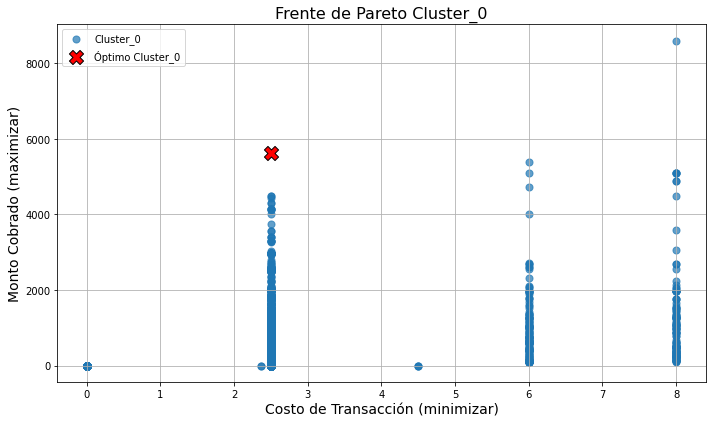

C:\Users\hendr\AppData\Local\Temp\ipykernel_49744\1336751353.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


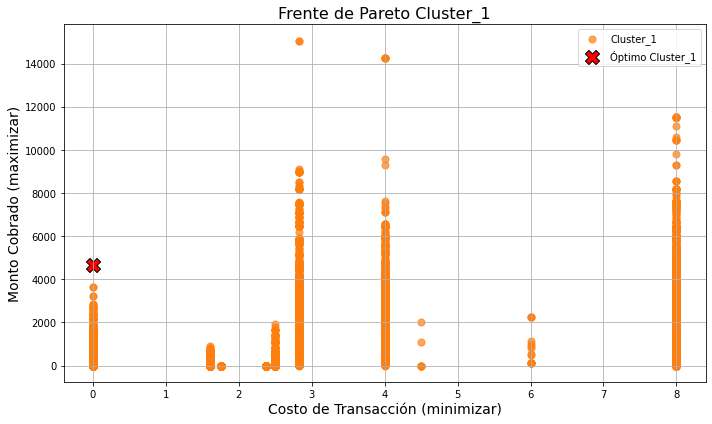

C:\Users\hendr\AppData\Local\Temp\ipykernel_49744\1336751353.py:62: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\hendr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


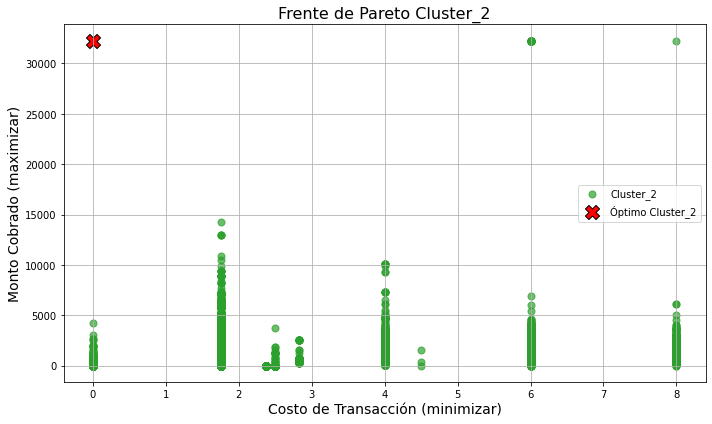

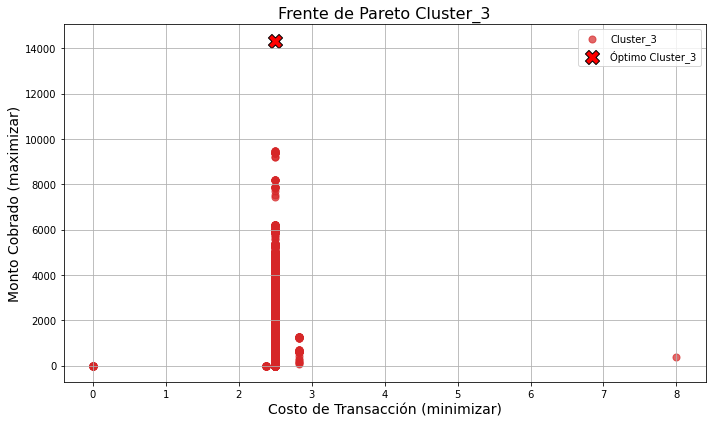

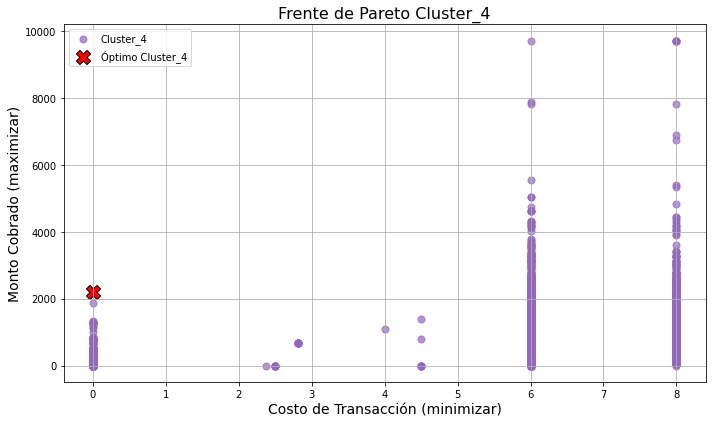


✅ Soluciones Óptimas por Clúster:
      Cluster  Costo Transacción  Monto Cobrado  idBanco  montoExigible  \
0  Cluster_0                2.5        5632.00     72.0        5632.00   
1  Cluster_1                0.0        4641.69     12.0        4641.69   
2  Cluster_2                0.0       32268.47     21.0       32268.47   
3  Cluster_3                2.5       14331.72     72.0       14331.72   
4  Cluster_4                0.0        2209.37     21.0        2209.37   

   hora_cos  diaEnvioCobro_cos  TipoEnvio  idEmisora  
0  0.241922           0.738326        6.0       12.0  
1 -0.999048          -0.534373        6.0        6.0  
2 -0.577145          -0.284359        2.0       25.0  
3  0.095846           0.158559        6.0       12.0  
4 -0.697790           0.309017        2.0       25.0  


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

clusters = {
    'Cluster_0': cluster_0,
    'Cluster_1': cluster_1,
    'Cluster_2': cluster_2,
    'Cluster_3': cluster_3,
    'Cluster_4': cluster_4
}

colores = sns.color_palette('tab10', len(clusters))

# Tabla para guardar las soluciones óptimas
soluciones_optimas = []

for idx, (nombre_cluster, df) in enumerate(clusters.items()):
    plt.figure(figsize=(10, 6))

    plt.scatter(
        df['costo_transaccion'],
        df['montoCobrado'],
        label=f'{nombre_cluster}',
        color=colores[idx],
        alpha=0.7,
        s=50
    )

    # Solución óptima: Mejor ratio cobro/costo
    ratio_optimo = (df['montoCobrado'] / df['costo_transaccion'].replace(0, 1e-9)).abs().idxmax()
    solucion_optima = df.loc[ratio_optimo]

    plt.scatter(
        solucion_optima['costo_transaccion'],
        solucion_optima['montoCobrado'],
        color='red',
        edgecolor='black',
        s=200,
        marker='X',
        label=f'Óptimo {nombre_cluster}'
    )

    soluciones_optimas.append({
        'Cluster': nombre_cluster,
        'Costo Transacción': solucion_optima['costo_transaccion'],
        'Monto Cobrado': solucion_optima['montoCobrado'],
        'idBanco': solucion_optima.get('idBanco', None),
        'montoExigible': solucion_optima.get('montoExigible', None),
        'hora_cos': solucion_optima.get('hora_cos', None),
        'diaEnvioCobro_cos': solucion_optima.get('diaEnvioCobro_cos', None),
        'TipoEnvio': solucion_optima.get('TipoEnvio', None),
        'idEmisora': solucion_optima.get('idEmisora', None)
    })

    plt.title(f'Frente de Pareto {nombre_cluster}', fontsize=16)
    plt.xlabel('Costo de Transacción (minimizar)', fontsize=14)
    plt.ylabel('Monto Cobrado (maximizar)', fontsize=14)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Mostrar claramente las soluciones óptimas en un DataFrame
soluciones_df = pd.DataFrame(soluciones_optimas)
print("\n✅ Soluciones Óptimas por Clúster:\n", soluciones_df)


In [52]:
soluciones_df = pd.DataFrame(soluciones_optimas)

In [53]:
soluciones_df

,Cluster,Costo Transacción,Monto Cobrado,idBanco,montoExigible,hora_cos,diaEnvioCobro_cos,TipoEnvio,idEmisora
0,Cluster_0,2.5,5632.00,72.0,5632.00,0.241922,0.738326,6.0,12.0
1,Cluster_1,0.0,4641.69,12.0,4641.69,-0.999048,-0.534373,6.0,6.0
2,Cluster_2,0.0,32268.47,21.0,32268.47,-0.577145,-0.284359,2.0,25.0
3,Cluster_3,2.5,14331.72,72.0,14331.72,0.095846,0.158559,6.0,12.0
4,Cluster_4,0.0,2209.37,21.0,2209.37,-0.697790,0.309017,2.0,25.0


# Automatización Final a partir de las Decisiones por Cluster

Como resultado del proceso completo, obtenemos **5 decisiones óptimas**, una por cada cluster identificado mediante el **Deep Embedding Clustering (DEC)**.

Estas decisiones, obtenidas a partir del frente de Pareto específico de cada cluster, se pueden conectar con la base de datos original mediante ingeniería inversa. Así, cuando un nuevo registro sea clasificado automáticamente mediante el modelo DEC, podremos asignarle directamente la decisión óptima relacionada al horario y método de cobro correspondiente a su cluster.

Aunque las decisiones se han resumido en solo **5 opciones**, la calidad de la segmentación realizada mediante clustering asegura que cada decisión sea altamente representativa y significativa para cada grupo. 

Esto permite:

- Una automatización eficiente.
- Optimización personalizada según el cluster identificado.
- Máxima flexibilidad estratégica, seleccionando siempre la mejor opción según las necesidades y prioridades cambiantes de la empresa.

Este enfoque garantiza una toma de decisiones ágil, precisa y orientada al máximo beneficio, optimizando tanto la cobranza como el control efectivo de los costos asociados.


In [54]:
soluciones_df = soluciones_df.rename(columns={
    'Cluster': 'cluster',
    'montoExigible': 'recomendacion_montoExigible',
    'hora_cos': 'recomendacion_hora_cos',
    'diaEnvioCobro_cos': 'recomendacion_diaEnvioCobro_cos',
    'TipoEnvio': 'recomendacion_TipoEnvio',
    'idEmisora': 'recomendacion_idEmisora'
})

# Mantener solo las columnas requeridas (ahora claramente incluyendo idEmisora)
soluciones_df = soluciones_df[['cluster', 
                               'recomendacion_montoExigible', 
                               'recomendacion_hora_cos', 
                               'recomendacion_diaEnvioCobro_cos', 
                               'recomendacion_TipoEnvio',
                               'recomendacion_idEmisora']]

# Convertir el identificador del cluster a números enteros
soluciones_df['cluster'] = soluciones_df['cluster'].str.extract('(\d+)').astype(int)

# Resultado final claro y completo
print(soluciones_df)



   cluster  recomendacion_montoExigible  recomendacion_hora_cos  \
0        0                      5632.00                0.241922   
1        1                      4641.69               -0.999048   
2        2                     32268.47               -0.577145   
3        3                     14331.72                0.095846   
4        4                      2209.37               -0.697790   

   recomendacion_diaEnvioCobro_cos  recomendacion_TipoEnvio  \
0                         0.738326                      6.0   
1                        -0.534373                      6.0   
2                        -0.284359                      2.0   
3                         0.158559                      6.0   
4                         0.309017                      2.0   

   recomendacion_idEmisora  
0                     12.0  
1                      6.0  
2                     25.0  
3                     12.0  
4                     25.0  


In [55]:
import numpy as np
import pandas as pd

# Función para recuperar valores cíclicos originales
def recuperar_valores_ciclicos(cos_valor, periodo):
    angulo = np.arccos(cos_valor)
    solucion1 = (angulo * periodo) / (2 * np.pi)
    solucion2 = ((2 * np.pi - angulo) * periodo) / (2 * np.pi)
    return f"{solucion1:.2f}, {solucion2:.2f}"

# Recuperar horas originales
soluciones_df['recomendacion_hora'] = soluciones_df['recomendacion_hora_cos'].apply(
    lambda x: recuperar_valores_ciclicos(x, periodo=24))

# Recuperar días originales
soluciones_df['recomendacion_diaEnvioCobro'] = soluciones_df['recomendacion_diaEnvioCobro_cos'].apply(
    lambda x: recuperar_valores_ciclicos(x, periodo=365))

# Eliminar columnas originales en formato coseno
soluciones_df = soluciones_df.drop(columns=['recomendacion_hora_cos', 'recomendacion_diaEnvioCobro_cos'])

# Mostrar el resultado final claramente
print(soluciones_df)

   cluster  recomendacion_montoExigible  recomendacion_TipoEnvio  \
0        0                      5632.00                      6.0   
1        1                      4641.69                      6.0   
2        2                     32268.47                      2.0   
3        3                     14331.72                      6.0   
4        4                      2209.37                      2.0   

   recomendacion_idEmisora recomendacion_hora recomendacion_diaEnvioCobro  
0                     12.0        5.07, 18.93               43.00, 322.00  
1                      6.0       11.83, 12.17              124.00, 241.00  
2                     25.0        8.35, 15.65              108.00, 257.00  
3                     12.0        5.63, 18.37               82.00, 283.00  
4                     25.0        8.95, 15.05               73.00, 292.00  


In [44]:
#read csv file

data = pd.read_csv('df3.csv')

In [45]:
data

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idBanco_y,idEmisora,TipoEnvio,Emisora,Horacreacion,diaEnvioCobro,diaCobroBanco,diaCreacion
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,12,6,TRADICIONAL,REINTENTO,9.850000,61,NaN,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,2,5,TRADICIONAL,NoAplica,12.166667,142,NaN,142


In [56]:
import pandas as pd
import glob

# Ruta donde están los archivos CSV
archivos_csv = sorted(glob.glob("pareto_cluster_*.csv"))

# Leer y unir archivos CSV en un solo DataFrame
df_unido = pd.concat((pd.read_csv(archivo) for archivo in archivos_csv), ignore_index=True)

# Mostrar el resultado
print(df_unido.head())

# Opcionalmente, guardar el resultado final unido
df_unido.to_csv("pareto_clusters_unidos.csv", index=False)


   idBanco  montoExigible  hora_cos  diaEnvioCobro_cos  TipoEnvio  idEmisora  \
0      131   10938.854884 -0.596410           0.402983          2         19   
1       58    5298.992218  0.683987          -0.483594          3          8   
2      153    9928.935648 -0.700924           0.125922          1          9   
3      160    5698.251119 -0.885990          -0.610427          5         23   
4       83    4065.133366  0.310129          -0.896705          6          6   

   costo_transaccion  montoCobrado  
0          -0.421283   -131.468781  
1           1.677923   3245.899902  
2          -0.780048   -358.606049  
3          -0.408562   2441.610840  
4           0.988322   2171.669678  


In [57]:
import pandas as pd
import glob

# Obtener todos los archivos CSV de clusters
archivos_clusters = sorted(glob.glob("cluster_*.csv"))

# Cargar y concatenar todos los archivos CSV
df_clusters_unidos = pd.concat((pd.read_csv(archivo) for archivo in archivos_clusters), ignore_index=True)

# Mostrar primeras filas del resultado
print(df_clusters_unidos.head())

# Guardar resultado opcionalmente
df_clusters_unidos.to_csv("clusters_unidos.csv", index=False)


   idListaCobro  idCredito  consecutivoCobro  idBanco  montoExigible  \
0        139419     636732          35563474      127          53.51   
1        139420     377529          35563489      127         272.50   
2        139420     397484          35563501      127         210.55   
3        139420     447314          35563513      127          66.24   
4        139420     451411          35563515      127         301.98   

   montoCobrar  montoCobrado  idRespuestaBanco  idEmisora  TipoEnvio  Emisora  \
0        53.51           0.0               4.0          6          6        8   
1       272.50           0.0               4.0          6          6        8   
2       210.55           0.0               4.0          6          6        8   
3        66.24           0.0               4.0          6          6        8   
4       301.98           0.0               4.0          6          6        8   

   hora_cos  diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  \
0 -0.81664

In [ ]:
soluciones_df

In [58]:
import pandas as pd

# Suponiendo que ya tienes cargados tus datos
# df_clusters_unidos y soluciones_df

# Renombrar columna cluster en soluciones_df para hacer el merge
soluciones_df = soluciones_df.rename(columns={'Cluster': 'cluster'})

# Fusionar DataFrames según el cluster
df_final = pd.merge(df_clusters_unidos, soluciones_df, on='cluster', how='left')

# Guardar resultado final
df_final.to_csv("clusters_unidos_con_recomendaciones.csv", index=False)

# Mostrar primeras filas
print(df_final.head())


   idListaCobro  idCredito  consecutivoCobro  idBanco  montoExigible  \
0        139419     636732          35563474      127          53.51   
1        139420     377529          35563489      127         272.50   
2        139420     397484          35563501      127         210.55   
3        139420     447314          35563513      127          66.24   
4        139420     451411          35563515      127         301.98   

   montoCobrar  montoCobrado  idRespuestaBanco  idEmisora  TipoEnvio  ...  \
0        53.51           0.0               4.0          6          6  ...   
1       272.50           0.0               4.0          6          6  ...   
2       210.55           0.0               4.0          6          6  ...   
3        66.24           0.0               4.0          6          6  ...   
4       301.98           0.0               4.0          6          6  ...   

   diaEnvioCobro_cos  diaCobroBanco_cos  diaCreacion_cos  costo_transaccion  \
0           0.452072     

In [60]:
import pandas as pd

# Cargar ambos archivos CSV
df_recomendaciones = pd.read_csv('clusters_unidos_con_recomendaciones.csv')
df3 = pd.read_csv('df3.csv')

In [61]:
print(df_recomendaciones.columns.tolist())


['idListaCobro', 'idCredito', 'consecutivoCobro', 'idBanco', 'montoExigible', 'montoCobrar', 'montoCobrado', 'idRespuestaBanco', 'idEmisora', 'TipoEnvio', 'Emisora', 'hora_cos', 'diaEnvioCobro_cos', 'diaCobroBanco_cos', 'diaCreacion_cos', 'costo_transaccion', 'cluster', 'recomendacion_montoExigible', 'recomendacion_TipoEnvio', 'recomendacion_idEmisora', 'recomendacion_hora', 'recomendacion_diaEnvioCobro']


In [ ]:
df_recomendaciones

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idEmisora,TipoEnvio,...,diaEnvioCobro_cos,diaCobroBanco_cos,diaCreacion_cos,costo_transaccion,cluster,recomendacion_montoExigible,recomendacion_TipoEnvio,recomendacion_idEmisora,recomendacion_hora,recomendacion_diaEnvioCobro
0,139419,636732,35563474,127,53.51,53.51,0.0,4.0,6,6,...,0.452072,NaN,0.452072,0.0,0,5632.00,6.0,12.0,"5.07, 18.93","43.00, 322.00"
1,139420,377529,35563489,127,272.50,272.50,0.0,4.0,6,6,...,0.452072,NaN,0.452072,0.0,0,5632.00,6.0,12.0,"5.07, 18.93","43.00, 322.00"
2,139420,397484,35563501,127,210.55,210.55,0.0,4.0,6,6,...,0.452072,NaN,0.452072,0.0,0,5632.00,6.0,12.0,"5.07, 18.93","43.00, 322.00"
3,139420,447314,35563513,127,66.24,66.24,0.0,4.0,6,6,...,0.452072,NaN,0.452072,0.0,0,5632.00,6.0,12.0,"5.07, 18.93","43.00, 322.00"
4,139420,451411,35563515,127,301.98,301.98,0.0,4.0,6,6,...,0.452072,NaN,0.452072,0.0,0,5632.00,6.0,12.0,"5.07, 18.93","43.00, 322.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162234,416184,44282767,21,178.77,178.77,0.0,4.0,6,6,...,-0.755493,NaN,-0.755493,0.0,4,2209.37,2.0,25.0,"8.95, 15.05","73.00, 292.00"
8015062,162234,416184,44282768,21,268.15,268.15,0.0,4.0,6,6,...,-0.755493,NaN,-0.755493,0.0,4,2209.37,2.0,25.0,"8.95, 15.05","73.00, 292.00"
8015063,162234,524583,44282769,21,756.66,756.66,0.0,4.0,6,6,...,-0.755493,NaN,-0.755493,0.0,4,2209.37,2.0,25.0,"8.95, 15.05","73.00, 292.00"
8015064,162234,524583,44282770,21,1261.10,1261.10,0.0,4.0,6,6,...,-0.755493,NaN,-0.755493,0.0,4,2209.37,2.0,25.0,"8.95, 15.05","73.00, 292.00"


In [64]:
import pandas as pd

# Cargar los dos archivos CSV
df_recomendaciones = pd.read_csv('clusters_unidos_con_recomendaciones.csv')
df3 = pd.read_csv('df3.csv')

# Solo tomar las columnas de recomendaciones que necesitas
columnas_recomendacion = [
    'recomendacion_montoExigible', 
    'recomendacion_hora', 
    'recomendacion_diaEnvioCobro', 
    'recomendacion_TipoEnvio', 
    'recomendacion_idEmisora'
]

# Asegúrate de que ambos tengan exactamente el mismo número de filas
if len(df3) == len(df_recomendaciones):
    # Agregar columnas directamente a la derecha
    df3_con_recomendaciones = pd.concat([df3, df_recomendaciones[columnas_recomendacion]], axis=1)
    
    # Guardar resultado final
    df3_con_recomendaciones.to_csv('df3_con_recomendaciones.csv', index=False)
    
    print(df3_con_recomendaciones.head())
else:
    print("Los DataFrames no tienen el mismo número de filas. Verifica los archivos.")




   idListaCobro  idCredito  consecutivoCobro  idBanco_x  montoExigible  \
0        139345      85784          35530241         12         539.53   
1        139345     122162          35530242         12         468.56   
2        139345     122162          35530243         12         780.94   
3        139345     122162          35530244         12         312.37   
4        139345     123763          35530245         12         817.48   

   montoCobrar  montoCobrado  idRespuestaBanco  idBanco_y  idEmisora  ...  \
0       539.53           0.0               4.0         12          6  ...   
1       468.56           0.0               4.0         12          6  ...   
2       780.94           0.0               4.0         12          6  ...   
3       312.37           0.0               4.0         12          6  ...   
4       817.48           0.0               4.0         12          6  ...   

     Emisora Horacreacion  diaEnvioCobro  diaCobroBanco  diaCreacion  \
0  REINTENTO        

In [69]:
#read csv file

data = pd.read_csv('df3_con_recomendaciones.csv')


In [70]:
data 

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idBanco_y,idEmisora,...,Emisora,Horacreacion,diaEnvioCobro,diaCobroBanco,diaCreacion,recomendacion_montoExigible,recomendacion_hora,recomendacion_diaEnvioCobro,recomendacion_TipoEnvio,recomendacion_idEmisora
0,139345,85784,35530241,12,539.53,539.53,0.0,4.0,12,6,...,REINTENTO,9.850000,61,NaN,61,5632.00,"5.07, 18.93","43.00, 322.00",6.0,12.0
1,139345,122162,35530242,12,468.56,468.56,0.0,4.0,12,6,...,REINTENTO,9.850000,61,NaN,61,5632.00,"5.07, 18.93","43.00, 322.00",6.0,12.0
2,139345,122162,35530243,12,780.94,780.94,0.0,4.0,12,6,...,REINTENTO,9.850000,61,NaN,61,5632.00,"5.07, 18.93","43.00, 322.00",6.0,12.0
3,139345,122162,35530244,12,312.37,312.37,0.0,4.0,12,6,...,REINTENTO,9.850000,61,NaN,61,5632.00,"5.07, 18.93","43.00, 322.00",6.0,12.0
4,139345,123763,35530245,12,817.48,817.48,0.0,4.0,12,6,...,REINTENTO,9.850000,61,NaN,61,5632.00,"5.07, 18.93","43.00, 322.00",6.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8015061,162271,741795,44299050,2,980.32,980.32,0.0,4.0,2,5,...,NoAplica,12.166667,142,NaN,142,2209.37,"8.95, 15.05","73.00, 292.00",2.0,25.0
8015062,162271,741795,44299051,2,1633.86,1633.86,0.0,4.0,2,5,...,NoAplica,12.166667,142,NaN,142,2209.37,"8.95, 15.05","73.00, 292.00",2.0,25.0
8015063,162271,742470,44299052,2,810.44,810.44,0.0,4.0,2,5,...,NoAplica,12.166667,142,NaN,142,2209.37,"8.95, 15.05","73.00, 292.00",2.0,25.0
8015064,162271,742470,44299053,2,1350.74,1350.74,0.0,4.0,2,5,...,NoAplica,12.166667,142,NaN,142,2209.37,"8.95, 15.05","73.00, 292.00",2.0,25.0


In [67]:
import pandas as pd

# Cargar tu DataFrame
df = pd.read_csv('df3_con_recomendaciones.csv')

# Filtrar filas donde ambas columnas coinciden exactamente
df_iguales = df[df['recomendacion_montoExigible'] == df['montoExigible']]

# Mostrar resultado claramente
print(df_iguales.head())

# Opcionalmente guardar resultado
df_iguales.to_csv('filas_montoExigible_iguales.csv', index=False)


        idListaCobro  idCredito  consecutivoCobro  idBanco_x  montoExigible  \
563621        140760     684289          36135576         12        4641.69   
572441        140792     684289          36144641         12        4641.69   
578079        140849     684289          36152514         12        4641.69   
582552        140871     684289          36157919         12        4641.69   
587071        140889     684289          36163569         12        4641.69   

        montoCobrar  montoCobrado  idRespuestaBanco  idBanco_y  idEmisora  \
563621      4641.69           0.0               4.0         12         21   
572441      4641.69           0.0               4.0         12          6   
578079      4641.69           0.0               4.0         12          6   
582552      4641.69           0.0               4.0         12         21   
587071      4641.69           0.0               4.0         12          6   

        ...    Emisora Horacreacion  diaEnvioCobro  diaCobroBa

In [68]:
df_iguales

,idListaCobro,idCredito,consecutivoCobro,idBanco_x,montoExigible,montoCobrar,montoCobrado,idRespuestaBanco,idBanco_y,idEmisora,...,Emisora,Horacreacion,diaEnvioCobro,diaCobroBanco,diaCreacion,recomendacion_montoExigible,recomendacion_hora,recomendacion_diaEnvioCobro,recomendacion_TipoEnvio,recomendacion_idEmisora
563621,140760,684289,36135576,12,4641.69,4641.69,0.0,4.0,12,21,...,7455,8.133333,92,NaN,92,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
572441,140792,684289,36144641,12,4641.69,4641.69,0.0,4.0,12,6,...,REINTENTO,9.183333,92,NaN,92,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
578079,140849,684289,36152514,12,4641.69,4641.69,0.0,4.0,12,6,...,REINTENTO,13.983333,92,NaN,92,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
582552,140871,684289,36157919,12,4641.69,4641.69,0.0,4.0,12,21,...,7455,8.083333,93,NaN,93,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
587071,140889,684289,36163569,12,4641.69,4641.69,0.0,4.0,12,6,...,REINTENTO,8.966667,93,NaN,93,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4820936,155341,684289,41200697,12,4641.69,4641.69,0.0,4.0,12,21,...,7455,5.866667,359,NaN,359,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
4825305,155352,684289,41204828,12,4641.69,4641.69,0.0,4.0,12,6,...,REINTENTO,6.650000,359,NaN,359,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
4829855,155369,684289,41209378,12,4641.69,4641.69,0.0,4.0,12,6,...,REINTENTO,8.666667,359,NaN,359,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0
4834422,155391,684289,41219885,12,4641.69,4641.69,0.0,4.0,12,6,...,REINTENTO,10.616667,359,NaN,359,4641.69,"11.83, 12.17","124.00, 241.00",6.0,6.0


# Resultados Principales

Al finalizar el proceso de análisis y optimización, obtenemos **dos resultados principales**:

## 1. **`clusters_unidos_con_recomendaciones.csv`**
Este archivo corresponde a la metodología previamente descrita, donde la optimización multiobjetivo es aplicada a nivel de **cluster**. Proporciona recomendaciones generales pero efectivas, asignando valores recomendados para cada cliente en función del cluster al que pertenece.

- **Ventajas**:
  - Mayor eficiencia computacional.
  - Requiere menos recursos y menor volumen de datos.

- **Limitaciones**:
  - Las recomendaciones son generales para cada cluster, no individualizadas.

---

## 2. **`recomendaciones_Gradient_Boosting.csv`**
Este archivo presenta recomendaciones generadas aplicando optimización multiobjetivo directamente sobre cada **cliente individual**, utilizando modelos de Gradient Boosting. Aquí, se selecciona específicamente la mejor opción personalizada basada también en el frente de Pareto.

- **Ventajas**:
  - Recomendaciones altamente personalizadas para cada individuo.
  - Mayor precisión y adaptación a casos específicos.

- **Li**
